# Tirgul 10 test example

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### 1.	טען את המידע מהקישור הבא, הצג את 6 הרשומות האחרונות בו ואת שמות העמודות:

In [2]:

insurance = pd.read_csv("https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/tirgulim/tirgul10/insurance.csv")
insurance.tail(6)


,age,sex,bmi,children,smoker,region,expenses
1332,52,female,44.7,3,no,southwest,11411.69
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [4]:
# a good reference for working on this data
# http://rstudio-pubs-static.s3.amazonaws.com/274113_c958eac1bbe846969eb560e5ab3694b8.html#:~:text=The%20insurance.,value%20desginated%20for%20each%20level.

### 2.	הצג ויזואליזציה של התפלגות התוצאות לפי כמות הנבדקים

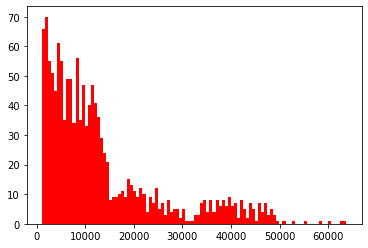

In [5]:

plt.hist(insurance['expenses'],bins = 100 , color = 'red') 
plt.show()

- we can see that most of insurance expenses are up to about 15,000

### 3.	הצג את כמות הגברים והנשים בדאטה

In [24]:
insurance.groupby('sex')['sex'].count()

sex
female    662
male      676
Name: sex, dtype: int64

### 4.הצג איור של אחוזי הגברים והנשים בדאטה

<AxesSubplot:ylabel='sex'>

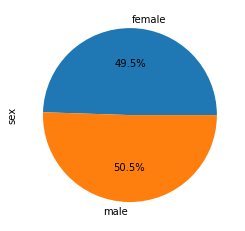

In [7]:
insurance.groupby('sex')['sex'].count().plot.pie(autopct='%1.1f%%')

### 5.	הצג דיאגרמה בה מוצגים אחוז המעשנים בכל מגדר

In [8]:
insurance['isSmoker'] =insurance['smoker'].astype('category').cat.codes
insurance.head()

,age,sex,bmi,children,smoker,region,expenses,isSmoker
0,19,female,27.9,0,yes,southwest,16884.92,1
1,18,male,33.8,1,no,southeast,1725.55,0
2,28,male,33.0,3,no,southeast,4449.46,0
3,33,male,22.7,0,no,northwest,21984.47,0
4,32,male,28.9,0,no,northwest,3866.86,0


In [9]:
# what if we would wish to switch between isSmoker 1 and 0 values?
# not operator
# 1-x => x=0, 1-x=1. x=1, 1-x=0

<AxesSubplot:ylabel='isSmoker'>

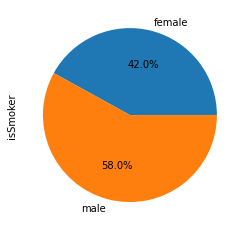

In [10]:
insurance.groupby('sex')['isSmoker'].sum().plot.pie(autopct='%1.1f%%')

### 6.	הצג בטבלה אחת את ממוצע ההוצאות לפי מגדר ועישון

In [11]:
insurance.groupby('sex')['isSmoker'].mean()
insurance.pivot_table('expenses', index='sex', columns='smoker')

smoker,no,yes
sex,,
female,8762.297367,30678.996261
male,8087.204971,33042.006226


- smoking effects expenses

### 7.	present corrolation between: age,bmi,children,expenses,smoker Using Pearson creteria.

<AxesSubplot:>

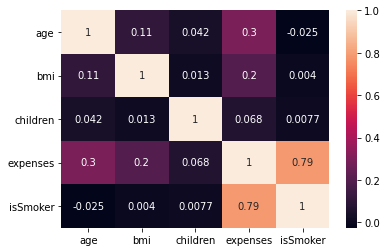

In [12]:
sns.heatmap(insurance.corr(), annot = True)

- As expected, high correlation between smoking and expenss.
- note that we got the proper columns without specifying them since correlation applies only for numeric values

### 8.	הצג תרשים של ההוצאות ביחס לגיל ולמגדר

Text(0.5, 1.0, 'Distribution of charges by age and sex')

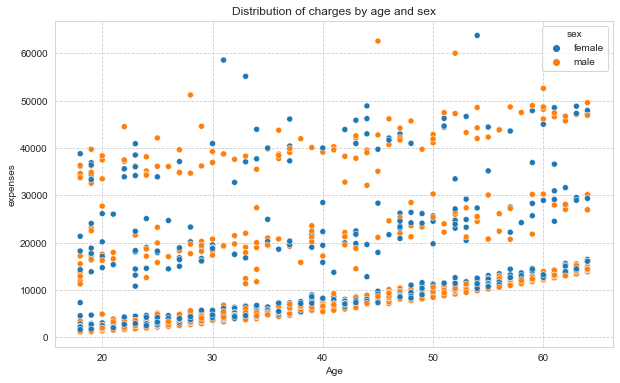

In [13]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "age", y = "expenses", data = insurance, hue = "sex")
plt.xlabel("Age")
plt.ylabel("expenses")
plt.title("Distribution of charges by age and sex")

- Age is a factor.
- Gender does not seem to have effect.
- Note for the 3 lines, suggesting there is another factor we did not recognize/

### 9.	הצג תרשים של ההוצאות ביחס לגיל ולקריטריון האם מעשן

Text(0.5, 1.0, 'Distribution of charges by age and smoker')

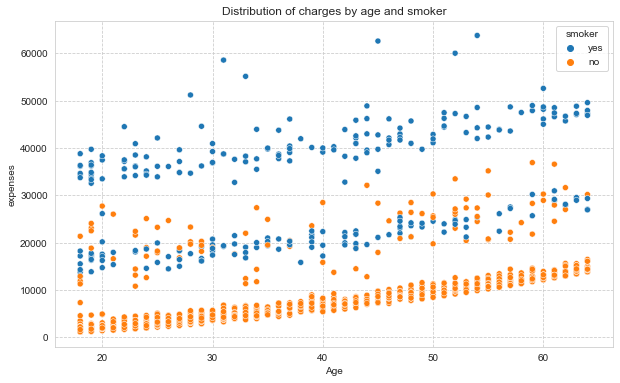

In [14]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "age", y = "expenses", data = insurance, hue = "smoker")
plt.xlabel("Age")
plt.ylabel("expenses")
plt.title("Distribution of charges by age and smoker")

- Smoking has major affect on insurance expenses

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

In [16]:
insurance['isMale'] = insurance['sex'].astype('category').cat.codes
insurance.head()

,age,sex,bmi,children,smoker,region,expenses,isSmoker,isMale
0,19,female,27.9,0,yes,southwest,16884.92,1,0
1,18,male,33.8,1,no,southeast,1725.55,0,1
2,28,male,33.0,3,no,southeast,4449.46,0,1
3,33,male,22.7,0,no,northwest,21984.47,0,1
4,32,male,28.9,0,no,northwest,3866.86,0,1


### 10.	אמן מודל החוזה הוצאות בהינתן: גיל, מגדר, bmi,עישון. הערך את המודל.

In [17]:
features = ['age','isMale','bmi','isSmoker']
pred_label = ['expenses']
# get dummies translates values to columns
# split to train and test data
X = insurance[features]
y = insurance[pred_label]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)  

X.head()

,age,isMale,bmi,isSmoker
0,19,0,27.9,1
1,18,1,33.8,0
2,28,1,33.0,0
3,33,1,22.7,0
4,32,1,28.9,0


In [18]:
def eval(x,y,model):
    pred = model.predict(x)
    y_alt=y.values
    resultMSE = mse(pred,y,squared=False)
    print("MSE: {:.3f}".format(resultMSE))   # note for CDR cat units    
    return resultMSE

In [19]:
model = DecisionTreeRegressor(random_state=42)

model.fit(X_train,y_train)
print("Depth:",model.get_depth())
resultMSE = eval(X_test,y_test,model)

Depth: 21
MSE: 6831.517


In [20]:
meanExpenses = insurance['expenses'].mean()


In [21]:
stdExpenses = insurance['expenses'].std()

In [22]:
1 - resultMSE /stdExpenses

0.4358785852482533